In [1]:
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import itertools
from matplotlib import pyplot as plt

<ipython-input-1-b1a85a7c37e2>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [2]:
X = []
y = []
os.chdir('C:/Users/Rasula/Desktop/training/meningioma_tumor')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(0)
os.chdir('C:/Users/Rasula/Desktop/training/glioma_tumor')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(1)
os.chdir('C:/Users/Rasula/Desktop/training/pituitary_tumor')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(2)


  0%|          | 0/822 [00:00<?, ?it/s]

  0%|          | 0/826 [00:00<?, ?it/s]

  0%|          | 0/827 [00:00<?, ?it/s]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)


In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [5]:
x = mobile.layers[-2].output
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
output=Dense(3,activation='softmax')(x) #final layer with softmax activation

In [6]:
model = Model(inputs=mobile.input, outputs=output)

In [7]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [9]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,
                    epochs=30,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/30
52/52 [==============================] - 38s 700ms/step - loss: 0.7435 - accuracy: 0.6894 - val_loss: 1.3574 - val_accuracy: 0.4871
Epoch 2/30
52/52 [==============================] - 37s 706ms/step - loss: 0.1857 - accuracy: 0.9323 - val_loss: 1.7331 - val_accuracy: 0.4908
Epoch 3/30
52/52 [==============================] - 39s 756ms/step - loss: 0.0586 - accuracy: 0.9848 - val_loss: 0.8425 - val_accuracy: 0.7295
Epoch 4/30
52/52 [==============================] - 37s 714ms/step - loss: 0.0215 - accuracy: 0.9987 - val_loss: 0.5695 - val_accuracy: 0.8237
Epoch 5/30
52/52 [==============================] - 37s 714ms/step - loss: 0.0117 - accuracy: 0.9992 - val_loss: 0.4616 - val_accuracy: 0.8788
Epoch 6/30
52/52 [==============================] - 37s 717ms/step - loss: 0.0101 - accuracy: 0.9985 - val_loss: 0.4054 - val_accuracy: 0.8788
Epoch 7/30
52/52 [==============================] - 37s 709ms/step - loss: 0.0095 - accuracy: 0.9989 - val_loss: 0.3238 - val_accuracy: 0.9082

In [11]:
tfjs_target_dir = 'C:/Users/Rasula/Desktop/jupyter-notebooks/models/newClassificationModel'
tfjs.converters.save_keras_model(model, tfjs_target_dir)

c:\users\rasula\documents\projects\braintumorclassifier\myenv\lib\site-packages\tensorflowjs\converters\keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


26/26 [==============================] - 9s 362ms/step - loss: 0.4001 - accuracy: 0.9266


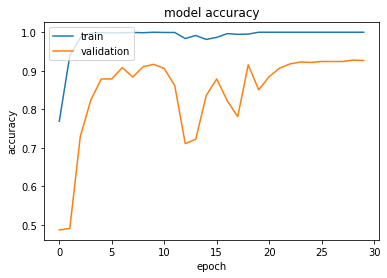

In [12]:
model.evaluate(X_test,y_test)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

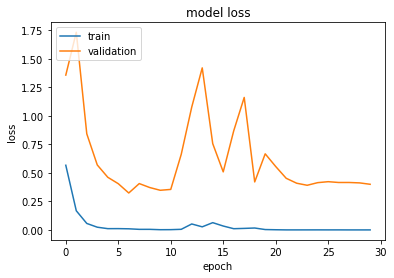

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

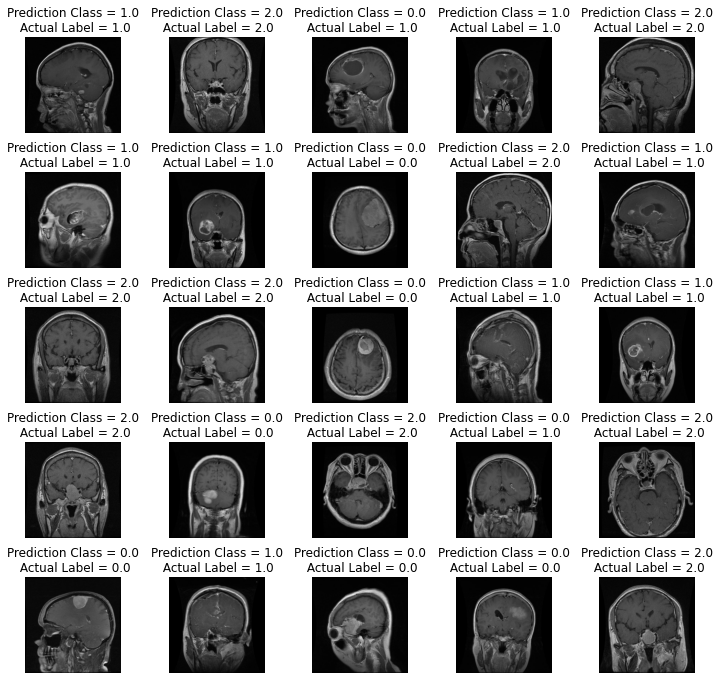

In [14]:
y_predicted=model.predict(X_test)
y_predicted=np.argmax(y_predicted,axis=1)
y_actual=np.argmax(y_test,axis=1)
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [15]:
cm = confusion_matrix(y_true=y_actual, y_pred=y_predicted)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[259  11  16]
 [ 22 236   5]
 [  6   0 262]]


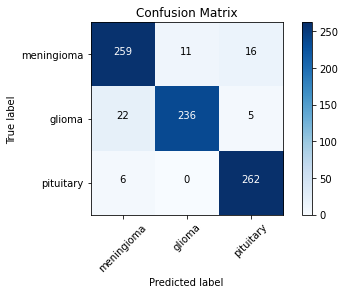

In [17]:
cm_plot_labels = ['meningioma','glioma', 'pituitary']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [18]:
print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       286
           1       0.96      0.90      0.93       263
           2       0.93      0.98      0.95       268

    accuracy                           0.93       817
   macro avg       0.93      0.93      0.93       817
weighted avg       0.93      0.93      0.93       817

